Exploratory Data analysis on Google play & IOS app



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read Data

In [2]:
df=pd.read_csv("AppleStore.csv")
df1=pd.read_csv("googleplaystore.csv")

There are two data sets for Google play & IOS app respectively.
df to be Applestore dataset & df1 to be googleplaystore data.

In [3]:
df.head()


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [4]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape

(7197, 16)

In [6]:
df1.shape

(10841, 13)

Let us get a summary of datasets.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

In [8]:
df.nunique()

id                  7197
track_name          7195
size_bytes          7107
currency               1
price                 36
rating_count_tot    3185
rating_count_ver    1138
user_rating           10
user_rating_ver       10
ver                 1590
cont_rating            4
prime_genre           23
sup_devices.num       20
ipadSc_urls.num        6
lang.num              57
vpp_lic                2
dtype: int64

In [9]:
df.prime_genre.unique()

array(['Social Networking', 'Photo & Video', 'Games', 'Music',
       'Reference', 'Health & Fitness', 'Weather', 'Utilities', 'Travel',
       'Shopping', 'News', 'Navigation', 'Lifestyle', 'Entertainment',
       'Food & Drink', 'Sports', 'Book', 'Finance', 'Education',
       'Productivity', 'Business', 'Catalogs', 'Medical'], dtype=object)

Removing non english letters in the track_name colum of apple store data frame.

In [10]:
final_df=df[df.track_name.map(lambda x: x.isascii())]
final_df.shape

(5707, 16)

In [11]:
df1.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2784
Android Ver         33
dtype: int64

In [12]:
df1.App.unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [13]:
df1_no_dup=df1.drop_duplicates(subset=['App'],keep='first')
df1_no_dup.shape

(9660, 13)

In [14]:
final_df1=df1_no_dup[df1_no_dup.App.map(lambda x: x.isascii())]
final_df1.shape

(9118, 13)

In [15]:
final_df.isnull().sum()


id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [16]:
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [17]:
df1.isnull().sum()/len(df1)

App               0.000000
Category          0.000000
Rating            0.135965
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000092
Price             0.000000
Content Rating    0.000092
Genres            0.000000
Last Updated      0.000000
Current Ver       0.000738
Android Ver       0.000277
dtype: float64

In [18]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9118 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9118 non-null   object 
 1   Category        9118 non-null   object 
 2   Rating          7752 non-null   float64
 3   Reviews         9118 non-null   object 
 4   Size            9118 non-null   object 
 5   Installs        9118 non-null   object 
 6   Type            9117 non-null   object 
 7   Price           9118 non-null   object 
 8   Content Rating  9117 non-null   object 
 9   Genres          9118 non-null   object 
 10  Last Updated    9118 non-null   object 
 11  Current Ver     9110 non-null   object 
 12  Android Ver     9115 non-null   object 
dtypes: float64(1), object(12)
memory usage: 997.3+ KB


In [19]:
final_df.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,5.707000e+03,5.707000e+03,5707.000000,5.707000e+03,5707.000000,5707.000000,5707.000000,5707.000000,5707.00000,5707.000000,5707.000000
mean,8.548787e+08,2.036429e+08,1.921701,1.455059e+04,519.584370,3.880147,3.668302,37.293850,3.91379,6.031891,0.995444
std,2.721919e+08,3.442784e+08,6.353830,8.304569e+04,4252.918015,1.076428,1.472442,3.896942,1.84054,8.358932,0.067349
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.00000,0.000000,0.000000
25%,5.931743e+08,4.845619e+07,0.000000,7.000000e+01,6.000000,3.500000,3.500000,37.000000,4.00000,1.000000,1.000000
50%,9.667586e+08,1.005517e+08,0.000000,4.700000e+02,37.000000,4.000000,4.000000,37.000000,5.00000,1.000000,1.000000
75%,1.078587e+09,1.897892e+08,2.990000,3.766500e+03,172.000000,4.500000,4.500000,38.000000,5.00000,10.000000,1.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.00000,75.000000,1.000000


In [20]:
#Looking for the description of data set
final_df1.describe()

,Rating
count,7752.000000
mean,4.173284
std,0.565783
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Exploring the Data:The key variables responsible for the engagement of the app are the columns of the data viz Category, Rating, Installs, Reviews, Content Reviews and Type of the App. So we analyze the data accordingly.

<Axes: xlabel='track_name', ylabel='count'>

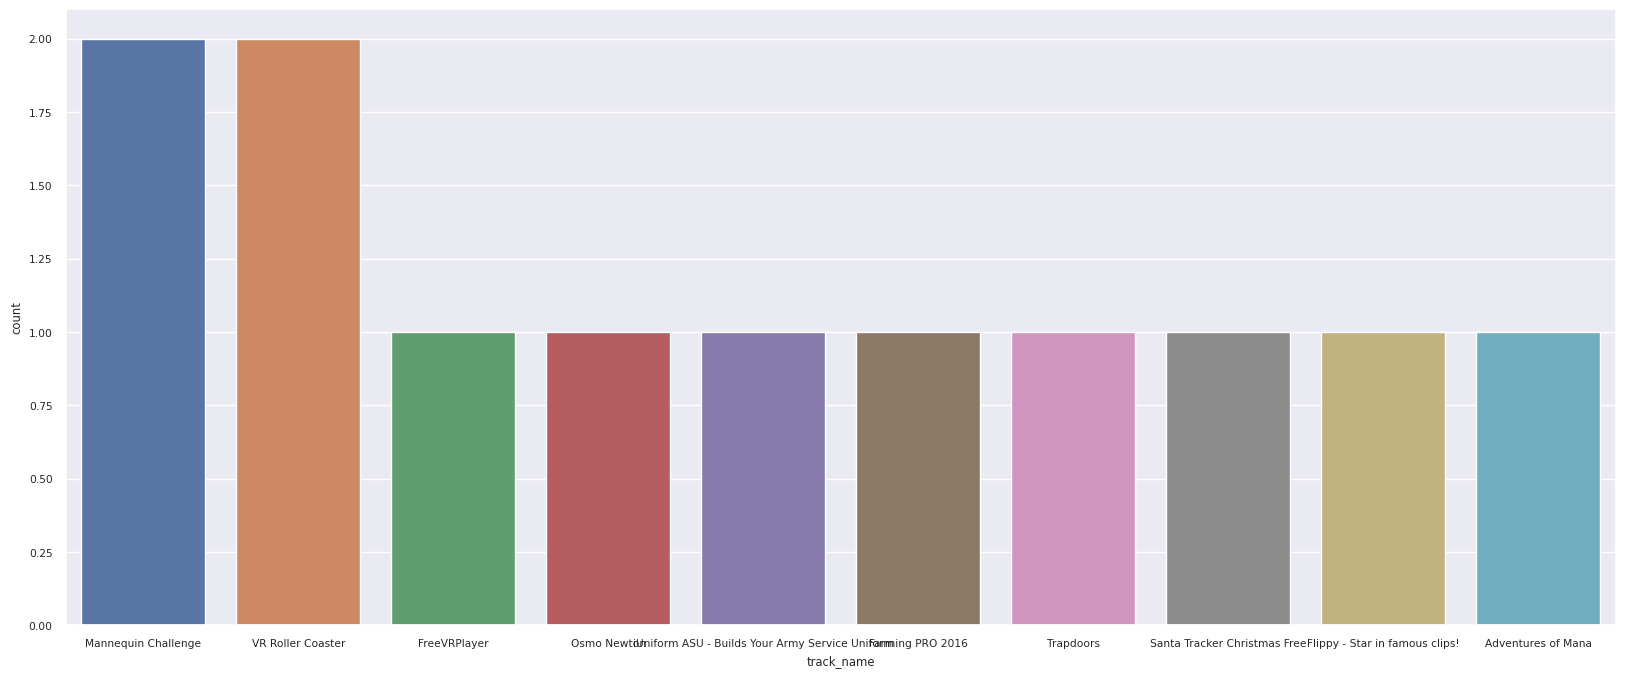

In [21]:
sns.set(rc={'figure.figsize': [20,8]},font_scale=0.7, style="darkgrid")
sns.countplot(x='track_name',data=final_df,order=final_df.track_name.value_counts().iloc[:10].index)

<Axes: xlabel='prime_genre', ylabel='count'>

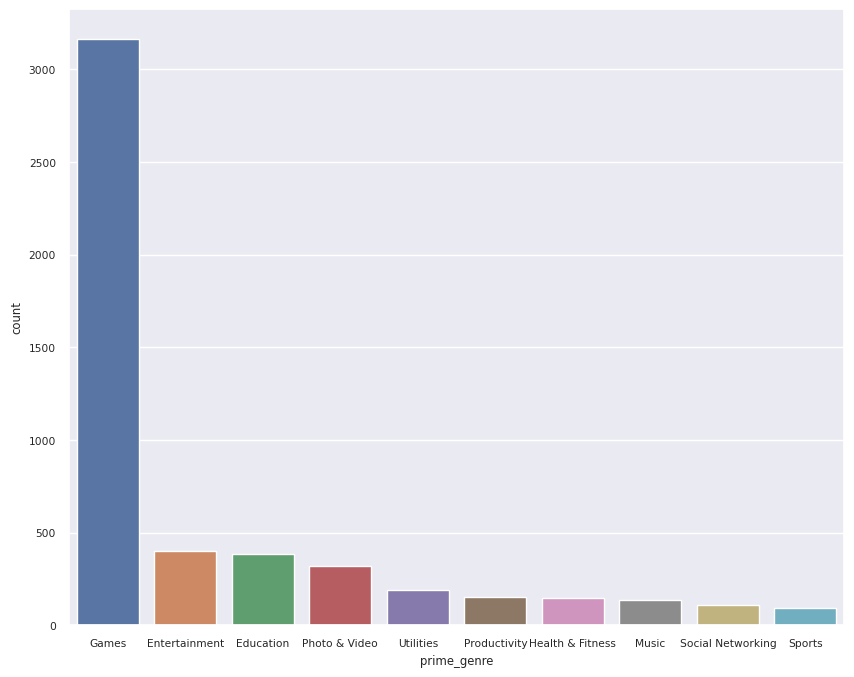

In [22]:
# Lets look at top 10 prime genre counts.
sns.set(rc={'figure.figsize': [10,8]},font_scale=0.7, style="darkgrid")
sns.countplot(x='prime_genre',data=final_df,order=final_df.prime_genre.value_counts().iloc[:10].index)

<Axes: xlabel='prime_genre', ylabel='count'>

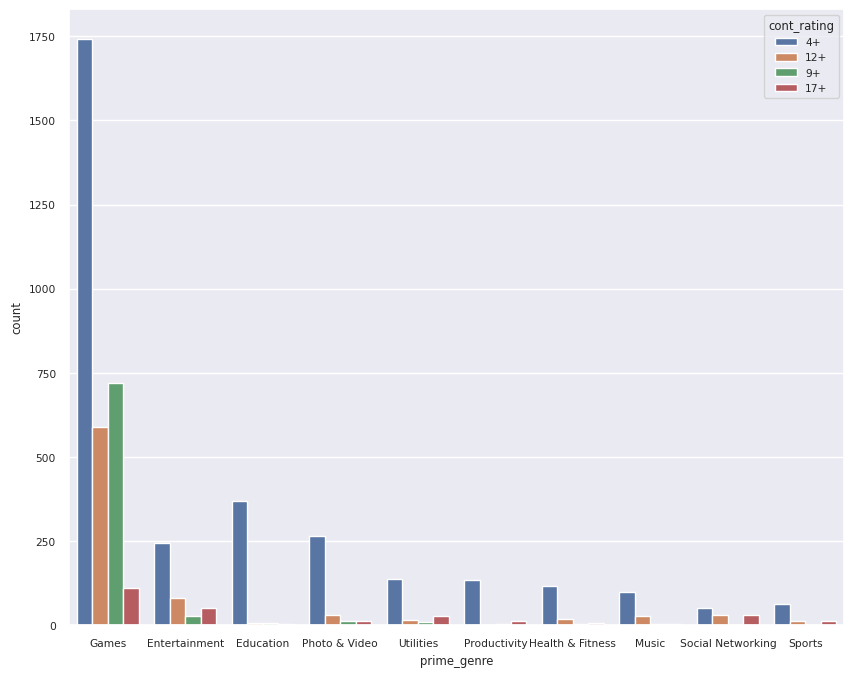

In [23]:
sns.countplot(data=final_df,x='prime_genre',hue='cont_rating',order=final_df.prime_genre.value_counts().iloc[:10].index)

Comparing with price, rating distribution is queit clear, interestingly the greater part of the App are rated with score 4.5-5.0

<Axes: xlabel='user_rating', ylabel='Count'>

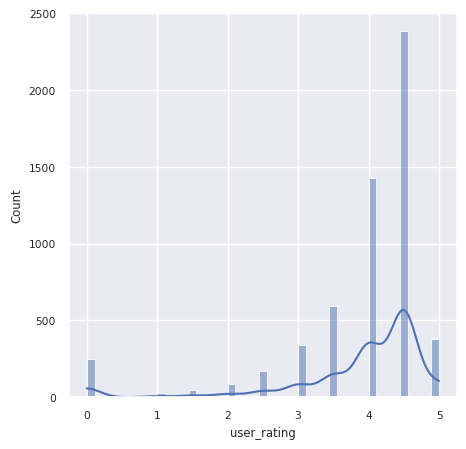

In [35]:
plt.figure(figsize=(5,5))
sns.histplot(data=final_df,x='user_rating',kde=True)

Let's see how many apps in each category, we can find that the most popular category is game, there are 3862 Apps that are game, and there are 535 Apps that are entertainment.

,prime_genre,price
7,Games,3165
4,Entertainment,402
3,Education,385
14,Photo & Video,322
21,Utilities,192
15,Productivity,152
8,Health & Fitness,146
11,Music,134
18,Social Networking,111
19,Sports,92


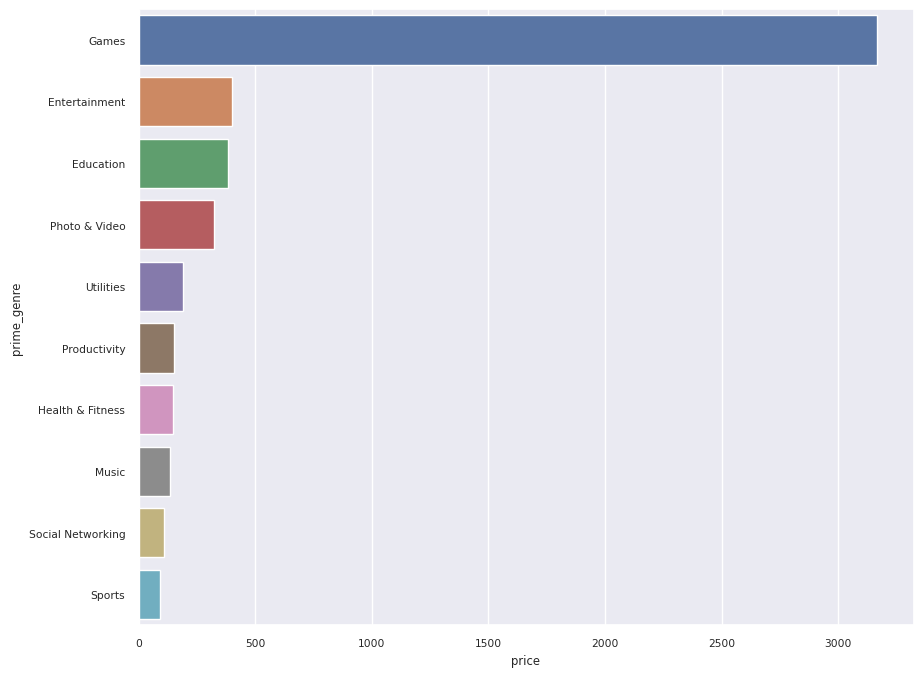

In [25]:
app_data_cate_bar = final_df.groupby(['prime_genre'])[['id']].count().reset_index().sort_values('id',ascending=False)
app_data_cate_bar.columns = ['prime_genre','price']
top_categories = app_data_cate_bar.head(10)

sns.barplot(y = 'prime_genre',x = 'price', data=top_categories)
top_categories

In [26]:
#Here we make dataframe for top most installed apps
top_installed_apps=final_df1.sort_values(by="Installs", ascending= False)
top_installed_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
403,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,"500,000,000+",Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
3703,MX Player,VIDEO_PLAYERS,4.5,6474426,Varies with device,"500,000,000+",Free,0,Everyone,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up


/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


<Axes: xlabel='Rating', ylabel='Installs'>

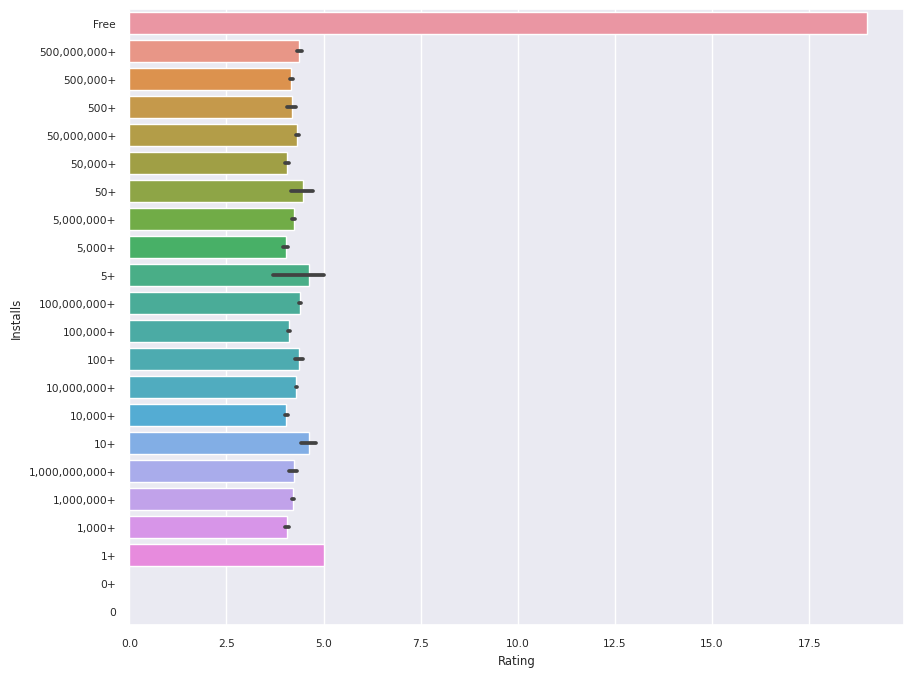

In [27]:
sns.barplot(y = 'Installs',x = 'Rating', data= top_installed_apps)


We could notice that alot of free apps were installed using Google play store.

<Axes: xlabel='Rating', ylabel='Count'>

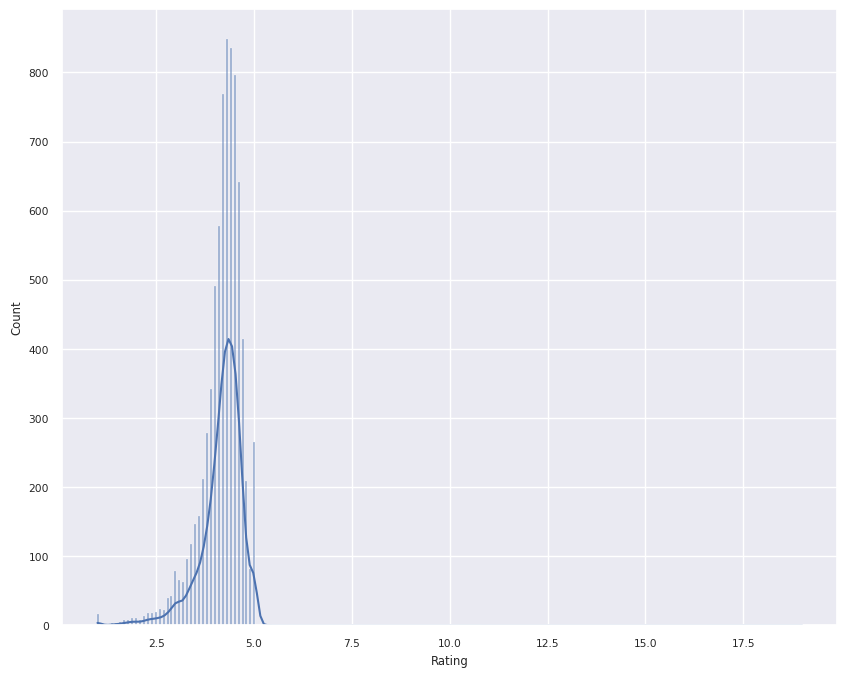

In [37]:
plt.figure(figsize=(10,8))
sns.histplot(data=final_df1,x='Rating',kde=True)


<Axes: xlabel='Genres', ylabel='count'>

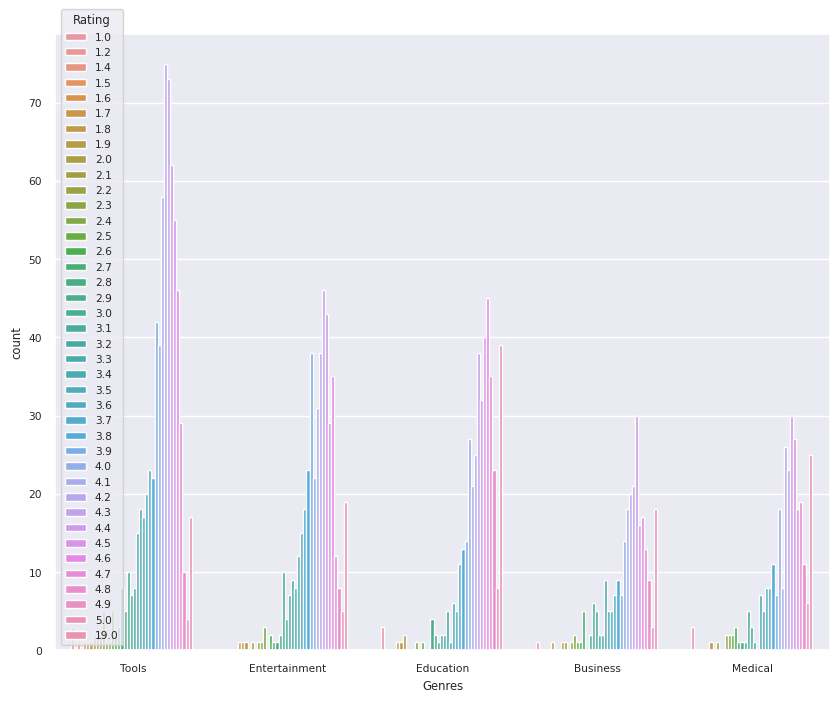

In [30]:
sns.countplot(data=final_df1,x='Genres',hue='Rating',order=final_df1.Genres.value_counts().iloc[:5].index)

<Axes: xlabel='Type', ylabel='count'>

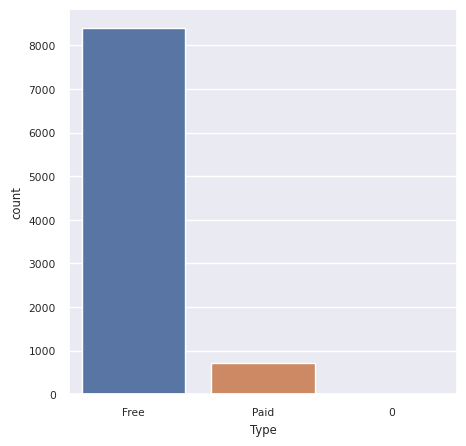

In [31]:
plt.figure(figsize = (5, 5))
sns.countplot(data=final_df1,x='Type')

<Axes: xlabel='App', ylabel='count'>

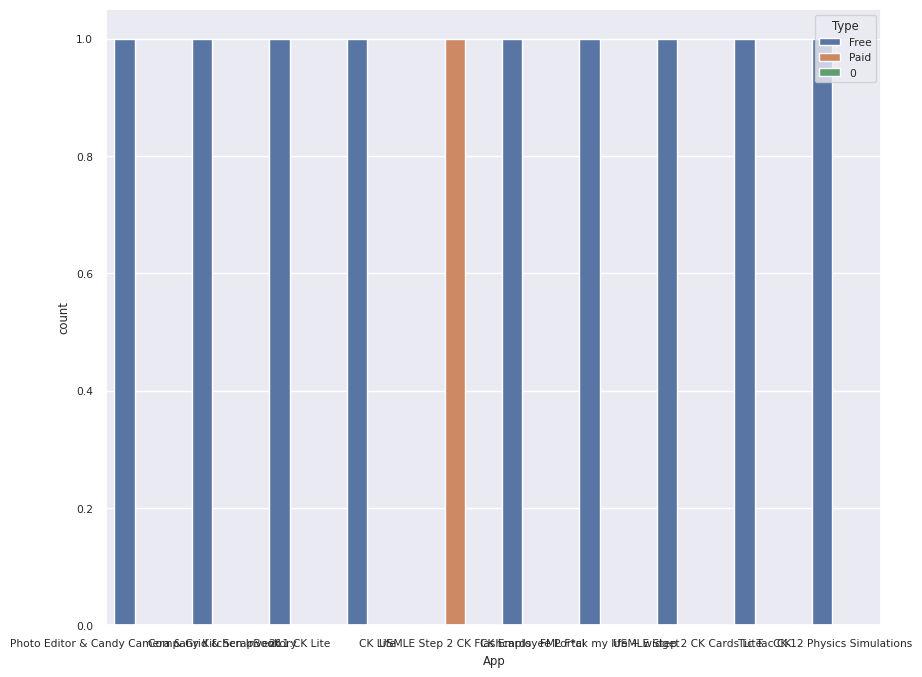

In [32]:
sns.countplot(data=final_df1,x='App',hue='Type',order=final_df1.App.value_counts().iloc[:10].index)

<Axes: xlabel='Rating'>

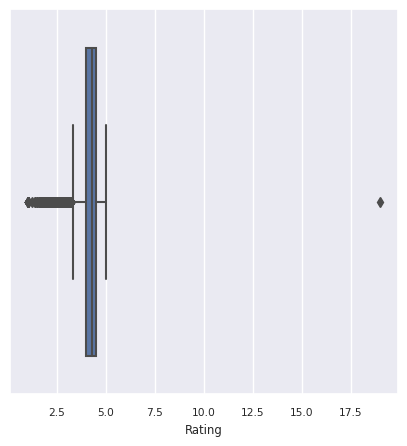

In [33]:
# Lets try to look at mean of ratings.
plt.figure(figsize=(5,5))
sns.boxplot(data=final_df1,x='Rating')

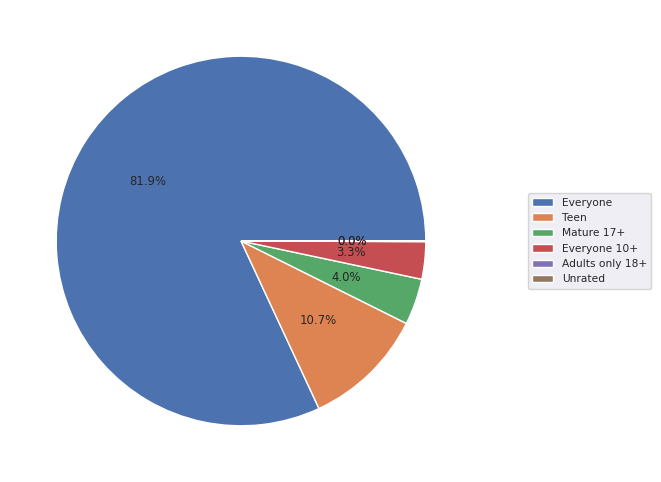

In [34]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
number_of_apps = final_df1["Content Rating"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))